<hr>
<p style="text-align:center; font-size:x-large; color:black;">A Mathematical Introduction to OLS Regression</p>
<hr>

When performing a Linear Regression, our goal is to model the relationship between one or more independent variables (predictors) and a dependent variable (response) by fitting a linear equation to observed data. This relationship is calculated through various methods,but the most most basic method is called __Ordinary Least Squares__ (OLS for short). In this section, I will walk through the math used to calculate the 'line of best fit'. <br>

Suppose we had n observations of data where there was one response variable Y along with p independent predictors x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>p</sub>. Additionally, suppose that each of our Y observations y<sub>i</sub> could be expressed as a linear combination of the observations of our p predictors, plus a normally distributed random error term. In matrix notation, we can express this assumption as the following... For reference, x<sub>p, i</sub> represents the i<sup>th</sup> observation of the p<sup>th</sup> predictor.

$$
y_{i} = \beta_{0} + \beta_{1}x_{1,i} + \beta_{2}x_{2,i} + \text{ } ... \text{ } + \beta_{p}x_{p,i} + \epsilon_{i}
$$ 

$$
= 
\begin{bmatrix}
\beta_{0} & \beta_{1} & ... & \beta_{p} \\
\end{bmatrix}  
\begin{bmatrix}
1 \\
x_{1,i} \\
x_{2,i} \\
\vdots \\
x_{p,i} \\
\end{bmatrix}
 + \epsilon_{i}
$$ 

$$
\text{ where }  \epsilon_{i} \sim N(0,\sigma^{2})
$$

If we wanted to express every single observation as one giant equation, we can do the following...

$$
\begin{bmatrix}
y_{1} & y_{2} & ... & y_{n} \\
\end{bmatrix} = 
\begin{bmatrix}
\beta_{0} & \beta_{1} & ... & \beta_{p} \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 & ... & 1 \\
x_{1,1} & x_{1,2} & ... & x_{1,n} \\
x_{2,1} & x_{2,2} & ... & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{p,1} & x_{p,2} & ... & x_{p,n} \\
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{n} \\
\end{bmatrix}, \text{ where } \epsilon_{i} \sim N(0,\sigma^{2}) \\
$$

$$ \vdots $$

$$
Y = \beta X + \epsilon 
$$

Since each  e<sub>i</sub> is a normally distributed random variable, we can only develop an expectation for y<sub>i</sub> given our linear combination of predictors. Our prediction for y<sub>i</sub> is often called "Y-hat"
$$
\hat{y_{i}} = E[{y_{i} \text{ }| \text{ } x_i, \text{ } \beta}] =  \beta x_{i}
$$

$$
\hat{Y_{i}} = E[{Y_{i} \text{ }| \text{ } X, \text{ } \beta}] =  \beta X
$$

So far, we haven't actually calculated &beta;. We want to find a &beta; that minimizes the variance of our normally distributed &epsilon;<sub>i</sub>s. To understand why, let's imagine a scenario where two weathermen are providing a forecast for tomorrow's weather. Weatherman 1 says that he's 95% confident that the temperature tomorrow will be between 0 and 100 degrees Fahrenheit. Weatherman 2 says that he's 95% confident that the temperature tomorrow will be between 65 and 67 degrees fahrenheit. Obviously weatherman 2's forecast would be considered better because it provides a more precise estimate of tomorrow's temperature.

$$
\text{Var}(e_{i}) = \frac{1}{n} \sum_{i=1}^{n} (e_{i} - E[e_{i}])^{2}
$$

$$
= \frac{1}{n} \sum_{i=1}^{n} (e_{i})^{2}
$$

$$
= \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}
$$

We quickly realize that the variance of &epsilon;<sub>i</sub> is equivalent to something called the __mean squared error (MSE)__. Therefore, minimizing the MSE results in a minimization in the variance of &epsilon;<sub>i</sub>. We can extrapolate even further and realize that minimizing the __Residual Sum of Squares (RSS)__ minimizes the MSE

$$
\text{Mean Squared Error (MSE)} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}
$$

$$
\text{Residual Sum of Squares (RSS)} = \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} = \text{MSE} * n
$$

Now, we can utilize calculus and linear algebra to find the &beta; that minimizes RSS

$$
\min_{\beta} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} = \min_{\beta} (Y - \hat{Y_{i}})^2  = \min_{\beta} (Y - \beta X)^2
$$

$$
\frac{d}{d\beta} (Y-\beta X)^2 = 2(Y-\beta X) * -X^{T} = -2X^{T} (Y-\beta X)
$$

$$
-2X^{T} (Y-\beta X) = 0
$$

$$
X^{T} (Y-\beta X) = 0
$$

$$
X^{T}Y - X^{T}X\beta = 0
$$

$$
X^{T}X\beta = X^{T}Y
$$

$$
\boxed{\beta = (X^{T}X)^{-1}X^{T}Y}
$$

$$
\frac{d^{2}}{d\beta d\beta^{T}} = 2 \parallel X \parallel ^{2} \text{ } \geq \text{ } 0
$$

Since the RSS is a quadratic function and our second derivative is postive, we know that we have found the global minimum. In some cases, (X<sup>T</sup>X) is not invertible, which means that (X<sup>T</sup>X)<sup>-1</sup> will not exist. In this case, we use __Gradient Descent__ methods to approximate a minimization for the MSE/RSS.


<hr>
<p style="text-align:center; font-size:x-large; color:black;">Running OLS in Statsmodels and Scikit-Learn</p>
<hr>

In [2]:
# All packages used throughout this notebook

# General
import warnings                                                             
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# Statmosdels
import statsmodels.api as sm

# Scikit-Learn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

Before running any type of regression, we need some data. Scikit-Learn has some free-to-use data sets, and all be using the Diabetes Dataset. <br><br>
 __age__ - age in years <br>
__sex__ - male or female <br>
__bmi__ - body mass index <br>
__bp__- average blood pressure <br>
__s1__- TC: total serum cholesterol <br>
__s2__- LDL: low-density lipoproteins <br>
__s3__- HDL: high-density lipoproteins <br>
__s4__- TCH: total cholesterol / HDL <br>
__s5__- LTG: possibly log of serum triglycerides level <br>
__s6__- GLU: blood sugar level <br>
__target__: a quantitative measure of disease progression one year after baseline <br>

In [3]:
diabetes = load_diabetes(scaled = True)     
# scaled = True makes sure that our data is normalized, which is important when the predictors have varying scales.
# If a predictor has values ranging from 0 - 10 million, while another predictor has values ranging from 0 - 0.1. 
# This potentially results in misrepresentative beta coefficients.
# Normalization enforces the same scale upon every predictor.

df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


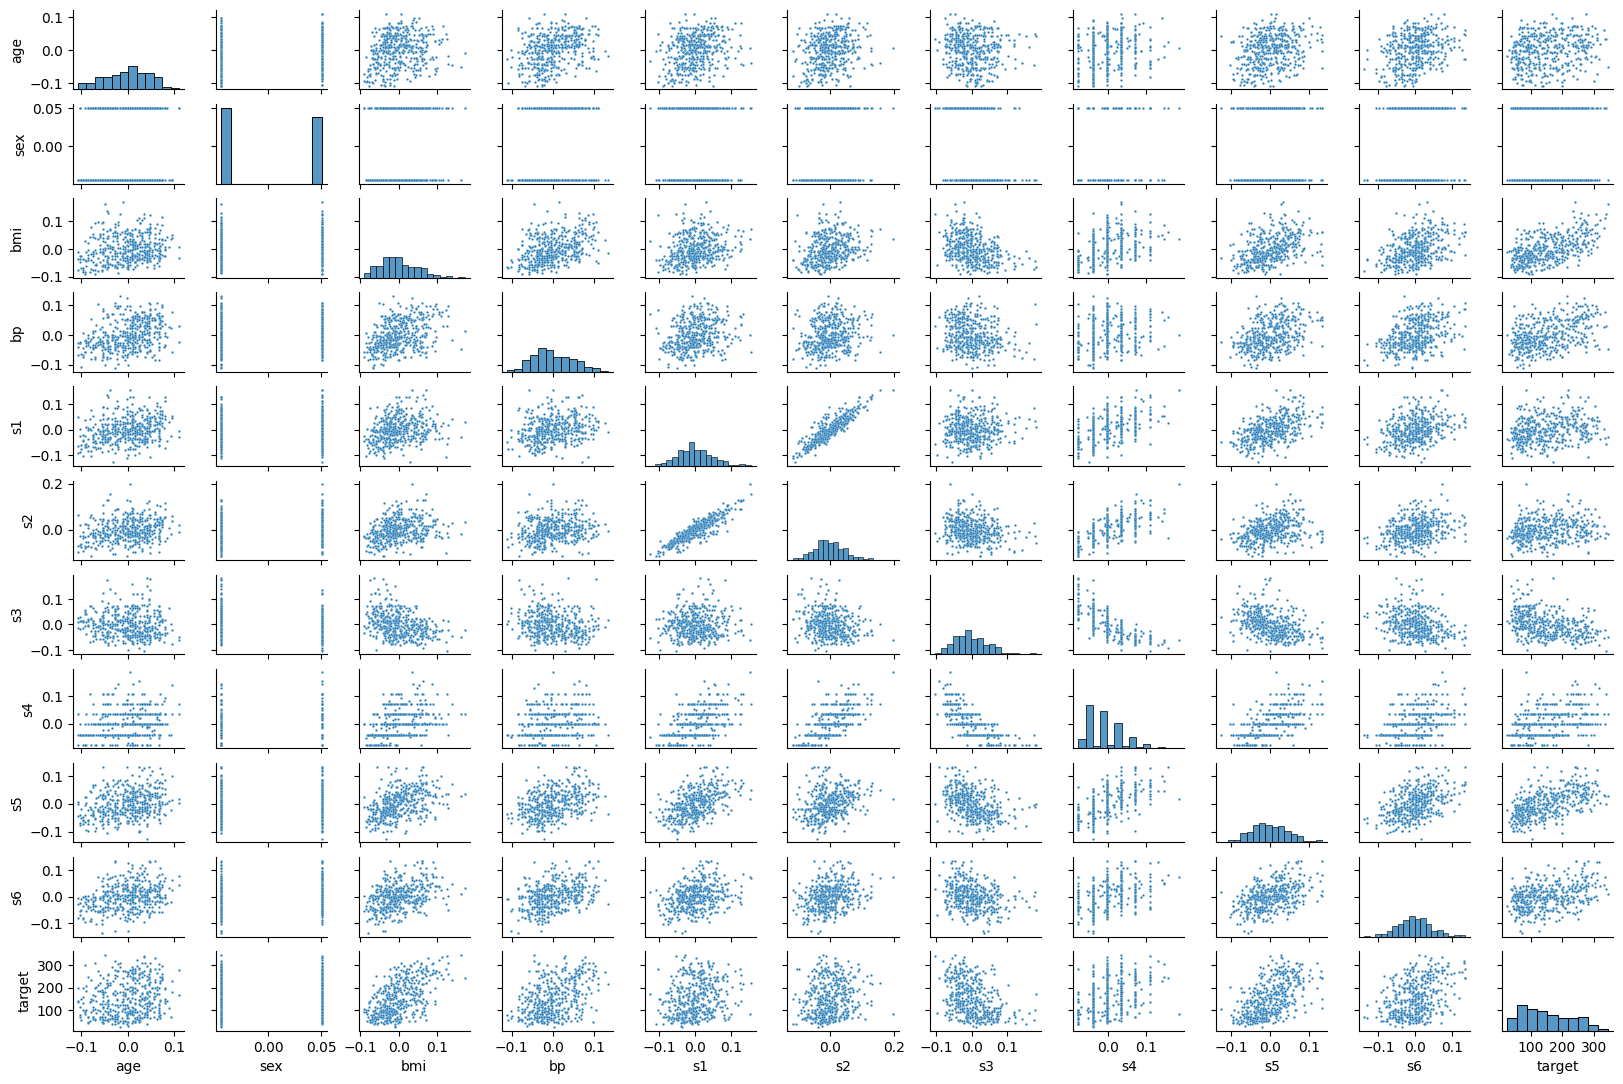

In [4]:
sns.pairplot(df, height = 1, aspect = 1.5, plot_kws = {'s': 3})
plt.show()

<p style="text-align:left; font-size:x-large; color:black;">Statsmodels Implementation</p>

Let's say I wanted to use OLS to find the relationship the response variable 'Target' and a single predictor 'bmi'. This is called a __simple linear regression__. In mathematical terms, we are trying to find best best &beta; to model

$$
\text{target} = \beta_{0} + \beta_{1}\text{(bmi)} + \epsilon
$$

We can use the OLS function in statsmodels. The proper form is __sm.OLS(target variable, predictor variables).fit()__

In [5]:
simple_model_sm = sm.OLS(df['target'], sm.add_constant(df['bmi'])).fit()
print(simple_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           3.47e-42
Time:                        12:42:42   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0

We can confirm that our mathematical appraoch to solving the &beta; coefficients will yield the same results using Numpy.

In [73]:
X = np.vstack((np.ones_like(df['bmi']), np.array(df['bmi']))).T
XTX = np.matmul(X.T, X)
Y = np.array(df['target']).reshape(-1,1)
coefficients = np.linalg.inv(XTX) @ X.T @ Y

print(f'(XTX)^-1 XTY = {coefficients}')
print(f'Constant: {coefficients[0][0]}')
print(f'BMI: {coefficients[1][0]}')

(XTX)^-1 XTY = [[152.13348416]
 [949.43526038]]
Constant: 152.13348416289622
BMI: 949.4352603840385



One major thing to note down is the usage of __sm.add_constant()__. Recall the matrix representation of the OLS problem:

$$
\begin{bmatrix}
y_{1} & y_{2} & ... & y_{n} \\
\end{bmatrix} = 
\begin{bmatrix}
\beta_{0} & \beta_{1} & ... & \beta_{p} \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 & ... & 1 \\
x_{1,1} & x_{1,2} & ... & x_{1,n} \\
x_{2,1} & x_{2,2} & ... & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{p,1} & x_{p,2} & ... & x_{p,n} \\
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{n} \\
\end{bmatrix}, \text{ where } \epsilon_{i} \sim N(0,\sigma^{2}) \\
$$
$$
\vdots
$$
$$
y_{i} = \beta_{0} + \beta_{1}x_{1,i} + \beta_{2}x_{2,i} + \text{ } ... \text{ } + \beta_{p}x_{p,i} + \epsilon_{i}
$$ 

Our top row is just a vector of ones, which is needed to get our constant &beta;<sub>0</sub> term. The sm.add_constant() function essentially appends a vector of 1s to our defined predictors so we can have a constant term. We can choose to not use sm.add_constant() if we do not want a constant term for our model.


Now let's say I wanted to use OLS to find the relationship the response variable 'Target' and a two predictors: 'bmi' and 's5'. This is called a __multiple linear regression__. In mathematical terms, we are trying to find best best &beta; to model

$$
\text{target} = \beta_{0} + \beta_{1}\text{(bmi)} + \beta_{2}\text{(s5)} + \epsilon
$$

In [6]:
multiple_model_sm = sm.OLS(df['target'], sm.add_constant(df[['bmi', 's5']])).fit()
# We use double brackets when referring to multiple columns.
print(multiple_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           2.25e-59
Time:                        12:43:40   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.702     56.303      0.0

<p style="text-align:left; font-size:x-large; color:black;">Scikit-Learn Implementation</p>

In [7]:
simple_model_sk = LinearRegression()
simple_model_sk.fit(df['bmi'].to_frame(), df['target'])

print('Simple Regression:')
print(f'Intercept Term: {round(simple_model_sk.intercept_, 4)}')
print(f'Coefficient of BMI: {round(simple_model_sk.coef_[0], 4)}')

Simple Regression:
Intercept Term: 152.1335
Coefficient of BMI: 949.4353


When doing linear regressions in Scikit-Learn, a constant term is included by default, so there's no equivalent to sm.add_constant()

In [8]:
multiple_model_sk = LinearRegression()
multiple_model_sk.fit(df[['bmi', 's5']], df['target'])

print('\nMultiple Regression:')
print(f'Intercept Term: {round(multiple_model_sk.intercept_, 4)}')
print(f'Coefficient of BMI: {round(multiple_model_sk.coef_[0], 4)}')
print(f'Coefficient of s5: {round(multiple_model_sk.coef_[1], 4)}')


Multiple Regression:
Intercept Term: 152.1335
Coefficient of BMI: 675.0714
Coefficient of s5: 614.9499


Statsmodels and Scikit-Learn offer their unique advantages when it comes to linear models, so it makes sense to understand both methodologies.

<p style="text-align:left; font-size:x-large; color:black;">Getting Predictions From Our Model</p>

Gathering predictions from our fitted OLS Regression (or any other linear model) are very useful when it comes to calculating scoring metrics and provoding a visualization of our model. You can get predicted values of statsmodels and sk-learn regression through __predict()__, while statsmodels has the unique feature __get_prediction()__.

Recall that each e<sub>i</sub> is an independent and identically distributed normally random variable. Therefore we can develop an expectation for y<sub>i</sub> given our linear combination of predictors. Our prediction for y<sub>i</sub> is often called "Y-hat"
$$
\hat{y_{i}} = E[{y_{i} \text{ }| \text{ } x_i, \text{ } \beta}] =  \beta x_{i}
$$
We can make our predictions a little better by providing a 95% confidence interval, which is possible since we know the variance of our i.i.d  e<sub>i</sub>s

$$
\text{95 Percent Confidence Interval of } \hat{y_{i}} = [\beta x_{i} - 1.96\sigma^{2}, \beta x_{i} + 1.96\sigma^{2}]
$$
$$
\text{where } \epsilon_{i} \sim N(0,\sigma^{2})
$$

__predict()__ will provide the expected value of y hat, while __get_prediction()__ will provide a confidence interval for y hat.


In [74]:
# Use of get_prediction()
bmi_values = np.linspace(np.min(df['bmi']), np.max(df['bmi']), 1000)
target_predictions_method1 = simple_model_sm.get_prediction(sm.add_constant(bmi_values))
mean_values = target_predictions_method1.predicted_mean
values_confidence_interval = target_predictions_method1.conf_int()

model_predictions = pd.DataFrame({'BMI Values': bmi_values,              
                                 'Fitted Target Values': mean_values,    
                                 '[0.025':values_confidence_interval[:, 0],     
                                 '0.975]':values_confidence_interval[:, 1]})    
                                
model_predictions

,BMI Values,Fitted Target Values,[0.025,0.975]
0,-0.090275,66.422935,53.885808,78.960062
1,-0.090014,66.670825,54.162069,79.179580
2,-0.089753,66.918714,54.438313,79.399116
3,-0.089492,67.166604,54.714538,79.618670
4,-0.089231,67.414493,54.990745,79.838242
...,...,...,...,...
995,0.169511,313.073071,291.441658,334.704484
996,0.169772,313.320961,291.658660,334.983262
997,0.170033,313.568850,291.875658,335.262042
998,0.170294,313.816740,292.092653,335.540827


In [23]:
# Use of predict() for both Statsmodels and Sklearn
bmi_values = np.linspace(np.min(df['bmi']), np.max(df['bmi']), 1000)

sm_target_predictions = simple_model_sm.predict(sm.add_constant(bmi_values))
sk_target_predictions = simple_model_sk.predict(bmi_values.reshape(-1, 1))
# for Sklearn, we need to reshape values into a column vector

model_predictions = pd.DataFrame({'BMI Values': bmi_values,
                                 'Fitted Target Values (Statsmodels)': sm_target_predictions,
                                 'Fitted Target Values (Sklearn)': sk_target_predictions})
model_predictions

,BMI Values,Fitted Target Values (Statsmodels),Fitted Target Values (Sklearn)
0,-0.090275,66.422935,66.422935
1,-0.090014,66.670825,66.670825
2,-0.089753,66.918714,66.918714
3,-0.089492,67.166604,67.166604
4,-0.089231,67.414493,67.414493
...,...,...,...
995,0.169511,313.073071,313.073071
996,0.169772,313.320961,313.320961
997,0.170033,313.568850,313.568850
998,0.170294,313.816740,313.816740


<p style="text-align:left; font-size:x-large; color:black;">Using Predictions to Graph an OLS</p>

Now that we know how to obtain predictions, we can do a little bit of manipulation in __matplotlib__ to visualize of OLS Regression results.

Text(0.5, 1.0, 'Simple Linear Regression Graph')

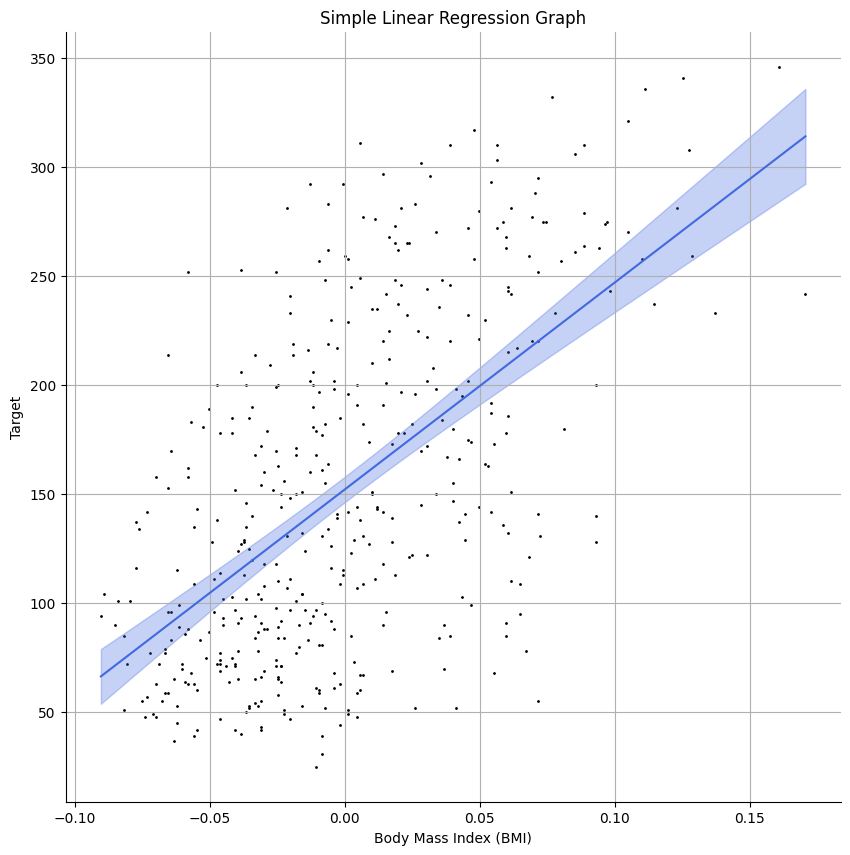

In [28]:
fig = plt.figure(figsize = (10,10))
plt.scatter(df['bmi'], df['target'], s = 1, color = 'black')
plt.plot(bmi_values, mean_values, color = '#4169E1', linestyle = '-')
plt.fill_between(bmi_values, values_confidence_interval[:, 0], values_confidence_interval[:, 1], color = '#4169E1', alpha = 0.3, label = 'Confidence Interval')
plt.grid(True)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Target')
plt.title('Simple Linear Regression Graph')

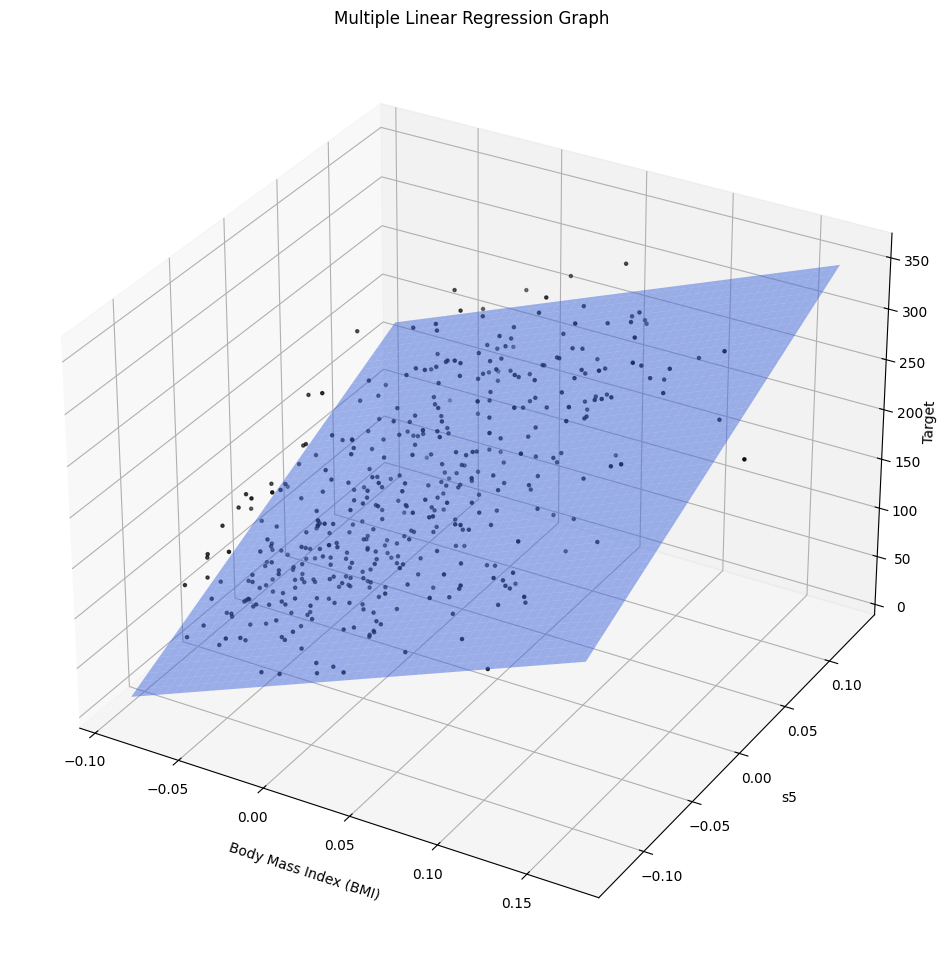

In [40]:
bmi_values = np.linspace(np.min(df['bmi']), np.max(df['bmi']), 100)
s5_values = np.linspace(np.min(df['s5']), np.max(df['s5']), 100)

x_coords, y_coords = np.meshgrid(bmi_values, s5_values)
meshgrid_coordinates = np.column_stack([x_coords.flatten(), y_coords.flatten()])

target_predictions = multiple_model_sk.predict(meshgrid_coordinates)
target_predictions = target_predictions.reshape(x_coords.shape)

fig = plt.figure(figsize = (12,12))
ax = plt.subplot(1, 1, 1, projection = '3d')
ax.scatter(df['bmi'], df['s5'], df['target'], color = 'black', s = 5)
ax.plot_surface(x_coords, y_coords, target_predictions, color = '#4169E1', alpha = 0.5)
ax.set_xlabel('Body Mass Index (BMI)', labelpad = 10)
ax.set_ylabel('s5', labelpad = 10)
ax.set_zlabel('Target', labelpad = 0)
ax.set_title('Multiple Linear Regression Graph')
plt.show()